[Ford go bike](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv)# Ford Bike trip Data analysis
## by Ahmed Alaa Hamada

## Preliminary Wrangling

This dataset includes bike trip data about rides that has been recorded by ford company.

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [10]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [11]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

The dataset consists of 16 features with a total of 183412 observations.


The main features are the durations of the ride, age of the members, gender of the members and the distances that they moved.


The features of interest are duration_sec, member_birth_year , member_gender, start_station_latitude start_station_longitude, end_station_latitude, end_station_longitude.

## Univariate Exploration

In [13]:
#Filling the nan in member gender was classified as others.
df["member_gender"] = df["member_gender"].fillna("Other")

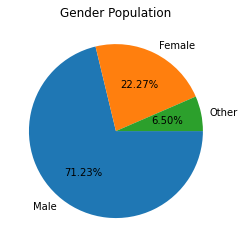

In [14]:
gender_Count = df["member_gender"].value_counts()
plt.pie(gender_Count, labels=["Male","Female","Other"], counterclock= False,radius = 1,autopct='%1.2f%%');
plt.title("Gender Population");

From the above Pie chart we can conclude that 71.2% of the population are males.

In [15]:
#Filling the NAN in member_birth_year the average year of the column with no decimals
df["member_birth_year"] = df["member_birth_year"].fillna(int(df["member_birth_year"].mean()))
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1984.0,Other,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


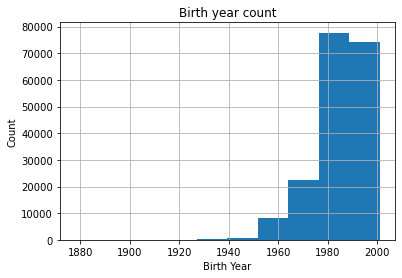

In [16]:
df["member_birth_year"].hist();
plt.xlabel("Birth Year");
plt.ylabel("Count");
plt.title("Birth year count");

In [17]:
print("Minimum year is",df["member_birth_year"].min())
df["member_birth_year"].value_counts()


Minimum year is 1878.0


1984.0    14827
1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
          ...  
1928.0        1
1878.0        1
1930.0        1
1910.0        1
1927.0        1
Name: member_birth_year, Length: 75, dtype: int64

As we can see, there are numbers of outliers that is messing with the histogram

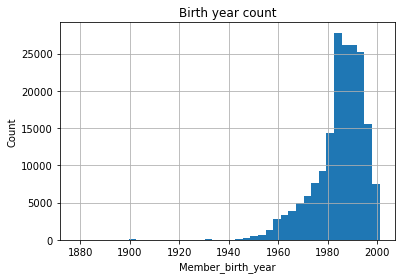

In [18]:
df["member_birth_year"].hist(bins = 40);
plt.xlabel("Member_birth_year");
plt.ylabel("Count");
plt.title('Birth year count');

In [19]:
df = df[df.member_birth_year > 1920.0]

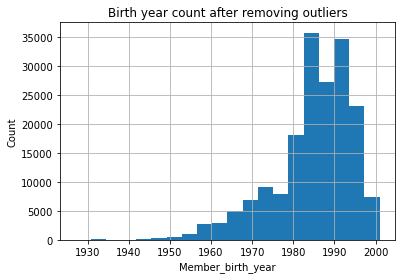

In [20]:
df["member_birth_year"].hist(bins = 20);
plt.xlabel("Member_birth_year");
plt.ylabel("Count");
plt.title('Birth year count after removing outliers');

We can see from the previous historgram that most of users were born in 1984 that which signficantly increased when we filled the NaN values with the mean

The distribution of the member birth year had outliers while the gender members has 6.5% of non specified others catigory.

We need to tidy the data to be able to do bivariante and multivariante exploration and be accurate about as some outliers or missing data can mess up the visualizations.

## Bivariate Exploration

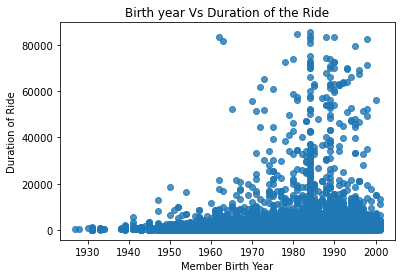

In [21]:
sb.regplot(data = df, x = 'member_birth_year', y = 'duration_sec',fit_reg=False);
plt.xlabel('Member Birth Year');
plt.ylabel('Duration of Ride');
plt.title('Birth year Vs Duration of the Ride');

As we can see, the younger customers have higher ride durations than the older customers.However, the two variables are not very correlated 

Text(0.5, 1.0, 'Genders vs Birth Year')

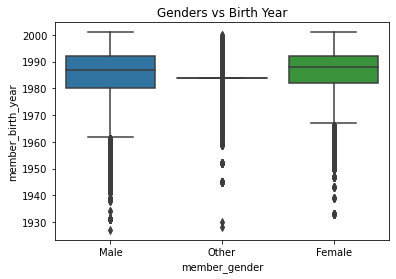

In [24]:
sb.boxplot(data = df, x = 'member_gender', y = 'member_birth_year')
plt.title("Genders vs Birth Year")

While the most of the population are young people as shown in the previous boxplot as it shows that older people are in fact  outliers. We were not able to exclude old people as they still represent a huge segment of the customers

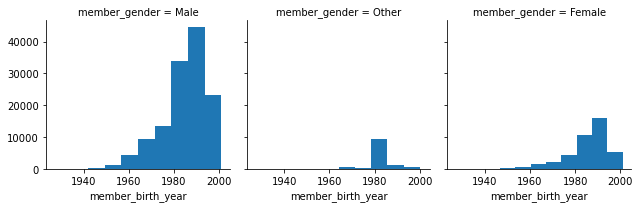

In [25]:
g = sb.FacetGrid(data = df, col = 'member_gender')
g.map(plt.hist, "member_birth_year");

The number of young customers represent the most of customers in each gender

The first visualizations showed moderate corrolation while the second clearly stated that we have to get rid of some of the data but on the other hand, it would make us remove of a huge segment of the customers. The third visualization showed that the gender affects the count but the rythm in all genders is the same.


## Multivariate Exploration

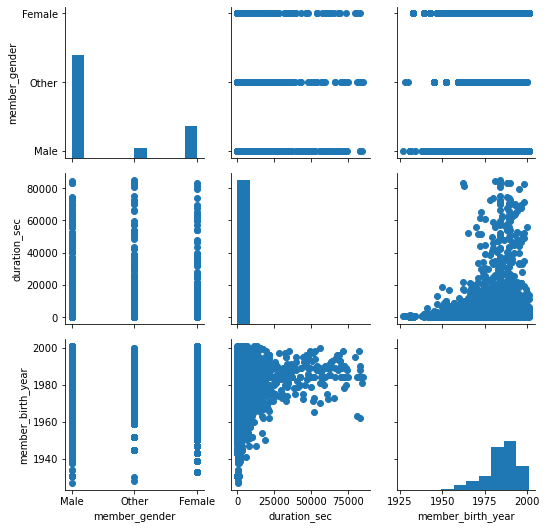

In [27]:
g1 = sb.PairGrid(data = df, vars = ['member_gender', 'duration_sec', 'member_birth_year']);
g1.map_diag(plt.hist);
g1.map_offdiag(plt.scatter);

The relationship between duration and birth year with the gender was moderate but showed good facts.
Logically the output came as expected as older people do less time and males gave the highest duration.